In [1]:
import pandas as pd
df=pd.read_csv("index.csv")
df=df.iloc[:,1:]
gen_df=df.iloc[:,8:]
gen_df['Volume']=df['Volume']
# 'time' 열을 맨 처음 열로 이동
gen_df.insert(0, 'time', df['time'])

C:\Users\Taewan\AppData\Local\Temp\ipykernel_2464\1609997512.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import prophet
from prophet import Prophet

In [8]:
Prophet?

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Docstring:     
Prophet forecaster.

Parameters
----------
growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
    flat trend.
changepoints: List of dates at which to include potential changepoints. If
    not specified, potential changepoints are selected automatically.
n_changepoints: Number of potential changepoints to include. Not used
    if input `changepoints` is supplied. If `changepoints` is not supplied,
    then n_changepoints potential changep

In [5]:
train = pd.DataFrame({"ds": gen_df["time"], "y": gen_df["rsi"]});train

,ds,y
0,2023-01-04 00:00:00,46.214262
1,2023-01-04 01:00:00,55.036042
2,2023-01-04 02:00:00,60.678232
3,2023-01-04 03:00:00,74.151418
4,2023-01-04 04:00:00,73.404367
...,...,...
9331,2024-01-27 19:00:00,64.725496
9332,2024-01-27 20:00:00,69.510990
9333,2024-01-27 21:00:00,71.876524
9334,2024-01-27 22:00:00,71.706699


In [6]:
prophet = Prophet(
# trend
growth = 'linear',
changepoints = None,

#사용 데이터
changepoint_range = 0.9, 

#클수록 과대적합(데이터별로 너무 까다롭다)
changepoint_prior_scale= 0.2, 

# seasonality
yearly_seasonality=False,
weekly_seasonality=True,
daily_seasonality=True,
seasonality_mode='multiplicative',

#mcmc
mcmc_samples = 80
)
prophet.fit(train) 

23:48:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:58:57 - cmdstanpy - INFO - CmdStan done processing.
23:58:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpd

In [7]:
future = prophet.make_future_dataframe(freq='h',periods=24*3) #향후 72시간 예측
forecast = prophet.predict(future)

In [8]:
forecast[['ds','yhat']]

,ds,yhat
0,2023-01-04 00:00:00,64.355340
1,2023-01-04 01:00:00,64.251974
2,2023-01-04 02:00:00,64.125879
3,2023-01-04 03:00:00,64.069433
4,2023-01-04 04:00:00,64.070166
...,...,...
9403,2024-01-30 19:00:00,50.342933
9404,2024-01-30 20:00:00,50.392389
9405,2024-01-30 21:00:00,50.452782
9406,2024-01-30 22:00:00,50.561769


In [9]:
forecast['yhat'].tail(20)

9388    49.236738
9389    49.299024
9390    49.263617
9391    49.168316
9392    49.135529
9393    49.256014
9394    49.487649
9395    49.675230
9396    49.683999
9397    49.526747
9398    49.363901
9399    49.371964
9400    49.598146
9401    49.930751
9402    50.205444
9403    50.342933
9404    50.392389
9405    50.452782
9406    50.561769
9407    50.664271
Name: yhat, dtype: float64

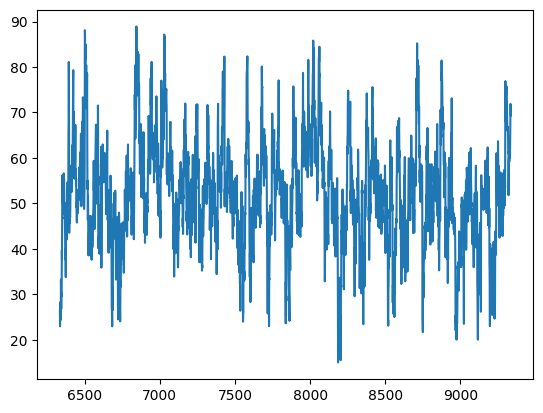

In [17]:
plt.plot(gen_df['rsi'].iloc[-3000:])

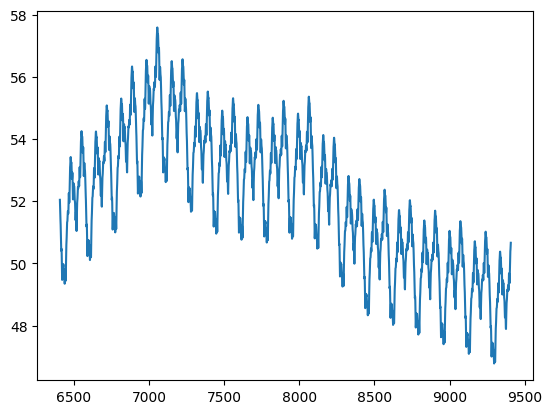

In [15]:
plt.plot(forecast['yhat'].iloc[-3000:])

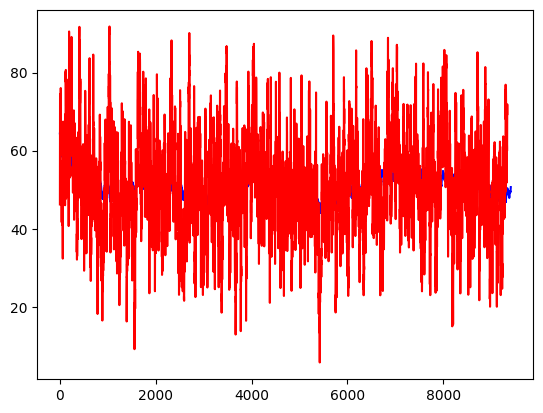

In [10]:
import matplotlib.pyplot as plt
# 시각화
plt.plot(forecast['yhat'], label='Prophet Prediction', color='blue')
plt.plot(gen_df['rsi'], label='Actual Data', color='red')
plt.show()

In [99]:
import pandas as pd
import numpy as np


In [125]:
np.mean(data["Volume"])

16831.177838435375

In [100]:
data=pd.read_csv("C:\\Users\\Taewan\\Desktop\\final\\ohlcvdata\\df.csv")

In [101]:
return_data=pd.DataFrame(data['returns'],columns=['returns']);return_data

,returns
0,NaN
1,0.001416
2,-0.000483
3,-0.000792
4,-0.000696
...,...
9403,0.002668
9404,0.003657
9405,0.002098
9406,-0.000059


In [171]:
data

,Unnamed: 0,time,Open,High,Low,Close,Volume,returns,volatility
0,0,2023-01-01 00:00:00,16537.5,16540.9,16504.0,16527.0,5381.399,NaN,NaN
1,1,2023-01-01 01:00:00,16527.1,16554.3,16524.1,16550.4,3210.826,0.001416,NaN
2,2,2023-01-01 02:00:00,16550.5,16557.1,16534.8,16542.4,2399.668,-0.000483,NaN
3,3,2023-01-01 03:00:00,16542.5,16542.5,16515.0,16529.3,3214.480,-0.000792,NaN
4,4,2023-01-01 04:00:00,16529.2,16530.4,16508.8,16517.8,3150.954,-0.000696,NaN
...,...,...,...,...,...,...,...,...,...
9403,9403,2024-01-27 19:00:00,41785.0,41977.0,41775.1,41896.4,7765.565,0.002668,0.002019
9404,9404,2024-01-27 20:00:00,41896.5,42070.0,41896.4,42049.6,5408.243,0.003657,0.002154
9405,9405,2024-01-27 21:00:00,42049.6,42165.6,42001.8,42137.8,5859.277,0.002098,0.002189
9406,9406,2024-01-27 22:00:00,42137.8,42187.1,42057.6,42135.3,5271.863,-0.000059,0.002191


In [103]:
ytest=[0.11,-0.01,-0.07,0.04,0.27,0.36,0.22,0.01,-0.08,-0.31,0.26,0.01,0.31,1.16,-0.37,-0.35,-0.06,0.24,0.2,0.06,-0.3,-0.13,-0.05,-0.26,-0.07,0.13,-0.34,-0.47,-0.44,0.38,0.08,-0.35,0.47,-0.14,0.45,0.18,0.22,-0.27,-0.17,0.05,-0.26,0.17,0.41,0.04,-0.16,-0.34,-0.23,-0.13,1.64,1.31,-0.47,0.07,-0.08,0.35,0.07,-0.15,0.44,-0.32,0.64,0.4,-0.22,-0.23,-0.13,-0.06,0.04,0.17,-0.25,0.36,0.13,-0.33,-0.25,0.43,-0.23]

In [104]:
y_percent=[i/100 for i in ytest]

In [105]:
len(y_percent)

73

In [106]:
pd.DataFrame(y_percent)

,0
0,0.0011
1,-0.0001
2,-0.0007
3,0.0004
4,0.0027
...,...
68,0.0013
69,-0.0033
70,-0.0025
71,0.0043


In [107]:
len(data)

9408

In [108]:
b=list(data['returns'])
for i in range(len(y_percent)):
    b.append(y_percent[i])
len(b)

9481

In [109]:
df2=pd.DataFrame(b,columns=['returns']);df2

,returns
0,NaN
1,0.001416
2,-0.000483
3,-0.000792
4,-0.000696
...,...
9476,0.001300
9477,-0.003300
9478,-0.002500
9479,0.004300


In [110]:
# Calculate the rolling standard deviation of returns
df2['volatility'] = df2['returns'].rolling(window=20).std()

In [111]:
ytest=[df2['volatility'].iloc[-73:]]

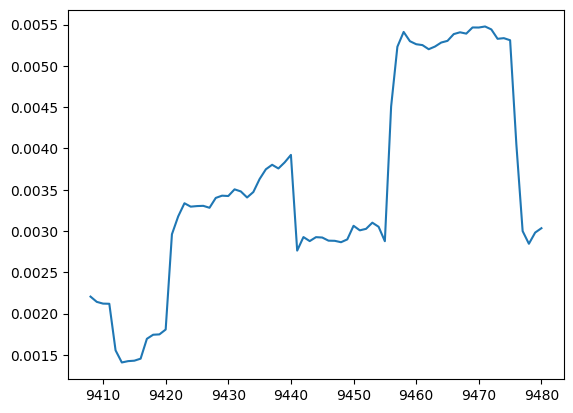

In [112]:
#true value
plt.plot(df2['volatility'].iloc[-73:])

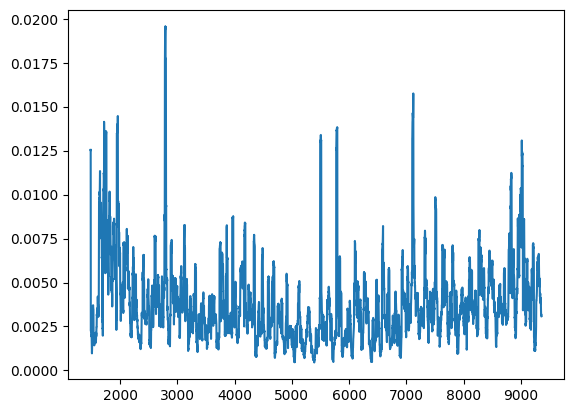

In [119]:
plt.plot(df2.volatility.iloc[-8000:-120])

In [113]:
dff=pd.read_csv("C:\\Users\\Taewan\\Desktop\\final\\submission.csv");dff

,Unnamed: 0.1,Unnamed: 0,pred_volatility
0,0,2024-01-28 0:00,0.002279
1,1,2024-01-28 1:00,0.002227
2,2,2024-01-28 2:00,0.002194
3,3,2024-01-28 3:00,0.002193
4,4,2024-01-28 4:00,0.001626
...,...,...,...
68,68,2024-01-30 20:00,0.002001
69,69,2024-01-30 21:00,0.002164
70,70,2024-01-30 22:00,0.002165
71,71,2024-01-30 23:00,0.002185


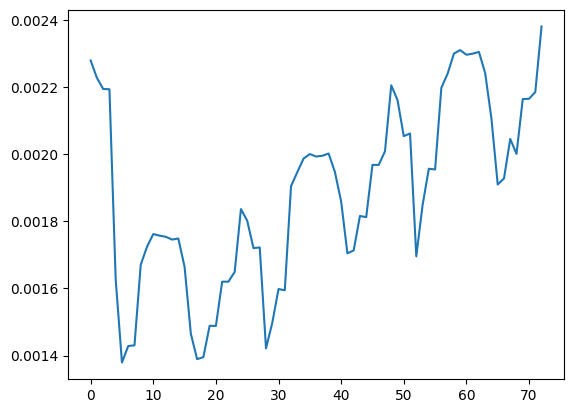

In [114]:
plt.plot(dff['pred_volatility'])

In [115]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(dff['pred_volatility'],df2['volatility'].iloc[-73:])

0.887554452634102

In [136]:
jh=pd.read_csv("C:\\Users\\Taewan\\Downloads\\28일예측.csv")

In [141]:
jh.columns=['time', 'Close']

In [139]:
def calculate_volatility(data, window=20):
    """
    Calculate the rolling volatility using the standard deviation of returns.
    :param data: DataFrame with OHLCV data
    :param window: The number of periods to use for calculating the standard deviation
    :return: DataFrame with the volatility values
    """

    # Calculate daily returns
    data['returns'] = data['Close'].pct_change()

    # Calculate the rolling standard deviation of returns
    data['volatility'] = data['returns'].rolling(window=window).std()

    return data

In [142]:
calculate_volatility(jh)

,time,Close,returns,volatility
0,0,42537.519610,NaN,NaN
1,1,42594.252148,0.001334,NaN
2,2,42649.070441,0.001287,NaN
3,3,42554.900782,-0.002208,NaN
4,4,42560.774016,0.000138,NaN
...,...,...,...,...
68,68,43053.160051,-0.005916,0.005423
69,69,43210.294271,0.003650,0.005477
70,70,43271.389721,0.001414,0.005461
71,71,43044.995030,-0.005232,0.005289


In [152]:
jhres=pd.concat([data[['Close','returns','volatility']],jh[['Close','returns','volatility']]])


In [153]:
jhres

,Close,returns,volatility
0,16527.000000,NaN,NaN
1,16550.400000,0.001416,NaN
2,16542.400000,-0.000483,NaN
3,16529.300000,-0.000792,NaN
4,16517.800000,-0.000696,NaN
...,...,...,...
68,43053.160051,-0.005916,0.005423
69,43210.294271,0.003650,0.005477
70,43271.389721,0.001414,0.005461
71,43044.995030,-0.005232,0.005289


In [154]:
calculate_volatility(jhres)

,Close,returns,volatility
0,16527.000000,NaN,NaN
1,16550.400000,0.001416,NaN
2,16542.400000,-0.000483,NaN
3,16529.300000,-0.000792,NaN
4,16517.800000,-0.000696,NaN
...,...,...,...
68,43053.160051,-0.005916,0.005423
69,43210.294271,0.003650,0.005477
70,43271.389721,0.001414,0.005461
71,43044.995030,-0.005232,0.005289


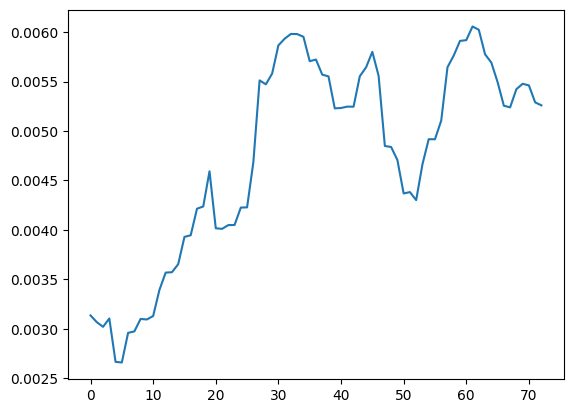

In [159]:
plt.plot(jhres['volatility'].iloc[-73:])

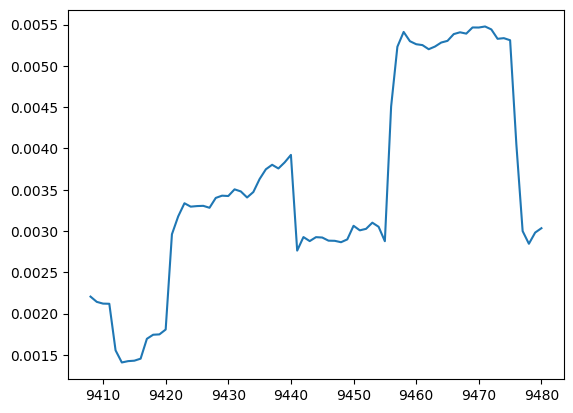

In [167]:
plt.plot(df2['volatility'].iloc[-73:])

In [179]:
mean_absolute_percentage_error(df2['volatility'].iloc[-73:],(dff['pred_volatility']+jhres['volatility'].iloc[-73:])/2)

0.25722487015754697

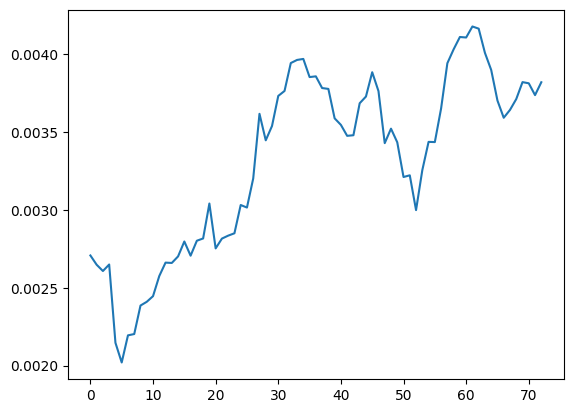

In [178]:
plt.plot((dff['pred_volatility']+jhres['volatility'].iloc[-73:])/2)

In [174]:
plt.plot(dff['pred_volatility']+jhres['volatility'].iloc[-73:])/2)

SyntaxError: unmatched ')' (4168174036.py, line 1)